In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
vistas        = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_3_vistas.csv')

In [5]:
postulaciones = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_4_postulaciones.csv')

In [20]:
avisos_online = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_5_avisos_online.csv')

In [15]:
avisos_detalle = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_6_avisos_detalle.csv')

In [16]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1001284385,1,Dejanos tu CV,<p><br />Si est&aacute;s interesado en ser par...,Corrientes,NaN,NaN,Full-time,NaN,Otros,Establecimiento Las Marías
1,1110092955,1,para línea de producción (ref. 28376),<p>Empresas vinculadas a la industria automotr...,GBA Oeste,NaN,NaN,Full-time,NaN,Producción,RANDSTAD
2,1110092958,1,para mantenimiento (ref. 27181),"<p style=""display: inline !important;"">Empresa...",GBA Oeste,NaN,NaN,Full-time,NaN,Mantenimiento,RANDSTAD
3,1110391074,1,Trabajá con nosotros,<p><strong>Trabaj&aacute; con nosotros</strong...,Cordoba,NaN,NaN,Full-time,NaN,Ingeniería Industrial,Coca Cola Andina Argentina
4,1110669632,1,Técnico de Mantenimiento,<p>Experiencia en f&aacute;bricas cosm&eacute;...,GBA Oeste,NaN,", Lanús",Full-time,NaN,Mantenimiento,PLUMARI S A


In [17]:
len(avisos_detalle)

25288

In [18]:
# Estas columnas no aportan suficiente información
# idpais: Siempre vale 1
# ciudad: Hay alrededor de 50 registros con esta información, el resto es NaN
# mapacalle: Hay sólo 683 registros con esta información.
avisos_detalle = avisos_detalle.drop(axis=1, labels=['idpais', 'ciudad', 'mapacalle'])

In [19]:
(avisos_detalle['nombre_area'].value_counts()).describe()

count     188.000000
mean      134.510638
std       331.906396
min         1.000000
25%         7.000000
50%        36.500000
75%       118.250000
max      3153.000000
Name: nombre_area, dtype: float64

In [20]:
avisos_detalle['nombre_area'].value_counts()[(avisos_detalle['nombre_area'].value_counts() > 100)].sum()

21638

In [21]:
avisos_detalle.head()

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1001284385,Dejanos tu CV,<p><br />Si est&aacute;s interesado en ser par...,Corrientes,Full-time,NaN,Otros,Establecimiento Las Marías
1,1110092955,para línea de producción (ref. 28376),<p>Empresas vinculadas a la industria automotr...,GBA Oeste,Full-time,NaN,Producción,RANDSTAD
2,1110092958,para mantenimiento (ref. 27181),"<p style=""display: inline !important;"">Empresa...",GBA Oeste,Full-time,NaN,Mantenimiento,RANDSTAD
3,1110391074,Trabajá con nosotros,<p><strong>Trabaj&aacute; con nosotros</strong...,Cordoba,Full-time,NaN,Ingeniería Industrial,Coca Cola Andina Argentina
4,1110669632,Técnico de Mantenimiento,<p>Experiencia en f&aacute;bricas cosm&eacute;...,GBA Oeste,Full-time,NaN,Mantenimiento,PLUMARI S A


In [22]:
desc = avisos_detalle.iloc[1]['descripcion']

In [85]:
from descripcion_parser import parse as dp_parse

In [86]:
avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp_parse)

In [72]:
avisos_detalle.head()

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1001284385,Dejanos tu CV,si estas interesado ser parte del grupo marias...,Corrientes,Full-time,NaN,Otros,Establecimiento Las Marías
1,1110092955,para línea de producción (ref. 28376),empresas vinculadas industria automotriz zarat...,GBA Oeste,Full-time,NaN,Producción,RANDSTAD
2,1110092958,para mantenimiento (ref. 27181),empresas vinculadas industria automotriz zarat...,GBA Oeste,Full-time,NaN,Mantenimiento,RANDSTAD
3,1110391074,Trabajá con nosotros,trabaja nosotros te invitamos formar parte del...,Cordoba,Full-time,NaN,Ingeniería Industrial,Coca Cola Andina Argentina
4,1110669632,Técnico de Mantenimiento,experiencia fabricas cosmeticas alimenticias f...,GBA Oeste,Full-time,NaN,Mantenimiento,PLUMARI S A


In [26]:
avisos_detalle.columns[0]

'idaviso'

In [27]:
postulantes = pd.read_csv('/home/luciano/orga-datos/datos_preprocesados/postulantes.csv')

In [29]:
postulantes.head()

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
0,0z5Dmrd,0,0,0,0,0,0,Graduado,1965-10-22,MASC
1,0z5JW1r,0,0,0,0,0,0,Abandonado,1971-04-09,MASC
2,0z5VvGv,0,0,0,0,Graduado,0,0,1987-10-18,MASC
3,0zB01pE,0,0,0,0,0,0,Abandonado,1989-12-01,MASC
4,0zB026d,0,0,0,0,0,Graduado,0,1978-02-23,FEM


In [30]:
postulantes[postulantes['idpostulante'] == '6M9ZQR']

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
69266,6M9ZQR,0,0,0,0,0,0,Graduado,1976-03-29,FEM


In [31]:
avisos_detalle[avisos_detalle['idaviso'] == 739260]

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
19938,739260,Asistente Comercial,Nuestro cliente es una empresa nac. ubicada en...,Capital Federal,Full-time,Jefe / Supervisor / Responsable,Comercial,BUMERAN.COM ARGENTINA


In [33]:
desc_1 = avisos_detalle['descripcion'][0]
desc_2 = avisos_detalle['descripcion'][1]

In [34]:
dp_parse(desc_1)

'Si estás interesado en ser parte del Grupo Las Marías ingresá y dejanos tus datos.'

In [35]:
desc_2

'Empresas vinculadas a la industria automotriz en Zárate y Campana estarán seleccionando candidatos para desempeñarse en tareas de línea de producción para sus plantas industriales.\xa0 Los interesados deberán contar con estudios secundarios completos, tener 18 años o más y tener disponibilidad para trabajar en turnos rotativos.\xa0 \r\n \r\n Si estas interesado postulate a la referencia elegida. \r\n También podes enviarnos tu CV por mail a: cvcampana@randstad.com.ar . \r\n'

In [36]:
desc_2

'Empresas vinculadas a la industria automotriz en Zárate y Campana estarán seleccionando candidatos para desempeñarse en tareas de línea de producción para sus plantas industriales.\xa0 Los interesados deberán contar con estudios secundarios completos, tener 18 años o más y tener disponibilidad para trabajar en turnos rotativos.\xa0 \r\n \r\n Si estas interesado postulate a la referencia elegida. \r\n También podes enviarnos tu CV por mail a: cvcampana@randstad.com.ar . \r\n'

In [37]:
len(desc_1)

82

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

esp_stop_words = set(["0","1","2","3","4","5","6","7","8","9","_","a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber","habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda","segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"])
#esp_stop_words = set(['el', 'la', 'los', 
#        'les', 'que', 'para', 'las', 'como', 'donde', 'a', 'y', 
#        'o', 'por', 'pero', 'sobre', 'sin', 'en', 'con', 'tras',
#        'contra', 'queres', 'trabajo', 'se', 'de', 'requisito', 'requisitos',
#        'plata'])

tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words = esp_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(avisos_detalle['descripcion'])

In [29]:
tfidf_matrix

<19685x33504 sparse matrix of type '<class 'numpy.float64'>'
	with 1395379 stored elements in Compressed Sparse Row format>

In [39]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
u, s, vt = svds(tfidf_matrix, k=50)

In [40]:
s = s[::-1]

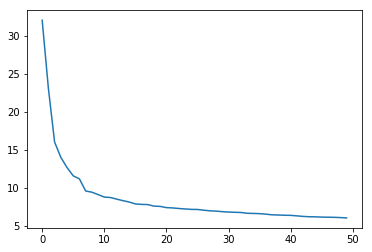

In [41]:
plt.plot(s)
#s[:25]

In [42]:
def calcular_distancias(id_1, id_2):
    dist = np.linalg.norm(u[id_1]-u[id_2])
    print('Desc 1:', avisos_detalle['descripcion'][id_1])
    print()
    print('Desc 2:', avisos_detalle['descripcion'][id_2])
    return dist

In [43]:
calcular_distancias(0, 1)

Desc 1: Si estás interesado en ser parte del Grupo Las Marías ingresá y dejanos tus datos.

Desc 2: Empresas vinculadas a la industria automotriz en Zárate y Campana estarán seleccionando candidatos para desempeñarse en tareas de línea de producción para sus plantas industriales.  Los interesados deberán contar con estudios secundarios completos, tener 18 años o más y tener disponibilidad para trabajar en turnos rotativos.  
 
 Si estas interesado postulate a la referencia elegida. 
 También podes enviarnos tu CV por mail a: cvcampana@randstad.com.ar . 



0.03811510320765986

In [44]:
calcular_distancias(0, 2)

Desc 1: Si estás interesado en ser parte del Grupo Las Marías ingresá y dejanos tus datos.

Desc 2: Empresas vinculadas a la industria automotriz en Zárate y Campana estarán seleccionando candidatos para desempeñarse en tareas de mantenimiento para sus plantas industriales.  Los interesados deberán contar con estudios secundarios técnicos completos , tener 18 años o más y tener disponibilidad para trabajar en turnos rotativos.  
 
 Si estas interesado postulate a la referencia elegida en  www.randstad.com.ar .. 
 También podes enviarnos tu CV por mail a: cvcampana@randstad.com.ar .  



0.032241494937407626

In [40]:
desc = "buscamos un chofer para manejar taxis con licencia profesional en caba horario extendido se trabaja feriados con experiencia en el rubro con probable"

In [49]:
avisos_detalle[avisos_detalle['descripcion'].str.contains('enfermer')]['descripcion']
desc_2681 = avisos_detalle['descripcion'][2681]
desc_233 = avisos_detalle['descripcion'][233]

In [50]:
desc_2681

'Se solicitan enfermeros con matricula habilitante para cubrir guardias: Pediatricas Diurnas (Día por medio de 8 a 20) Pediatricas Nocturnas (Noche por Medio de 20 a 8) Adultos Diurno (Día por medio de 8 a 20) Enviar CV para concertar entrevista'

In [51]:
desc_233

'Nos encontramos en búsqueda de un enfermero para integrar el equipo médico del Centro de Distribución de Buenos Aires ubicado en Santos Lugares. \xa0 Principales Responsabilidades: \xa0 -Asistir los primeros auxilios o emergencias que sucedan en el centro de distribución. -Llevar indicadores de la salud de los empleados. -Dar Charlas informativas sobre temas de salud y prevención -Realizar evaluaciones ergonómicas de los puestos de trabajo, entre otras tareas \xa0 Requisitos: \xa0 -Auxiliar de enfermería o afín, graduado \xa0 - Proactividad para sugerir oportunidades de mejora en el servicio. \xa0 Contamos con un interesante paquete de beneficios! \xa0 Lugar de trabajo: Santos Lugares, Provincia de Buenos Aires Horario: Lunes a viernes de 18 a 2am. Domingo de 00 a 6am Modalidad de trabajo: Efectivo, full-time \xa0'

In [52]:
calcular_distancias(2681, 233)

Desc 1: Se solicitan enfermeros con matricula habilitante para cubrir guardias: Pediatricas Diurnas (Día por medio de 8 a 20) Pediatricas Nocturnas (Noche por Medio de 20 a 8) Adultos Diurno (Día por medio de 8 a 20) Enviar CV para concertar entrevista

Desc 2: Nos encontramos en búsqueda de un enfermero para integrar el equipo médico del Centro de Distribución de Buenos Aires ubicado en Santos Lugares.   Principales Responsabilidades:   -Asistir los primeros auxilios o emergencias que sucedan en el centro de distribución. -Llevar indicadores de la salud de los empleados. -Dar Charlas informativas sobre temas de salud y prevención -Realizar evaluaciones ergonómicas de los puestos de trabajo, entre otras tareas   Requisitos:   -Auxiliar de enfermería o afín, graduado   - Proactividad para sugerir oportunidades de mejora en el servicio.   Contamos con un interesante paquete de beneficios!   Lugar de trabajo: Santos Lugares, Provincia de Buenos Aires Horario: Lunes a viernes de 18 a 2am. 

0.027132692092240774

In [54]:
calcular_distancias(1, 2681)

Desc 1: Empresas vinculadas a la industria automotriz en Zárate y Campana estarán seleccionando candidatos para desempeñarse en tareas de línea de producción para sus plantas industriales.  Los interesados deberán contar con estudios secundarios completos, tener 18 años o más y tener disponibilidad para trabajar en turnos rotativos.  
 
 Si estas interesado postulate a la referencia elegida. 
 También podes enviarnos tu CV por mail a: cvcampana@randstad.com.ar . 


Desc 2: Se solicitan enfermeros con matricula habilitante para cubrir guardias: Pediatricas Diurnas (Día por medio de 8 a 20) Pediatricas Nocturnas (Noche por Medio de 20 a 8) Adultos Diurno (Día por medio de 8 a 20) Enviar CV para concertar entrevista


0.038006980879228734

In [38]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
#print(energy_percentage)
sum(energy_percentage[:250])

59.507487490829966

In [60]:
from sklearn.cluster import KMeans

clusters = KMeans().fit_transform(u)

In [61]:
clusters

array([[0.02964121, 0.11650268, 0.0273621 , ..., 0.01483655, 0.10157156,
        0.01424319],
       [0.03990982, 0.12329781, 0.04570592, ..., 0.03948776, 0.11140439,
        0.03971529],
       [0.0351485 , 0.12306078, 0.04107938, ..., 0.03398198, 0.10930788,
        0.03472056],
       ...,
       [0.06169409, 0.12741304, 0.06052413, ..., 0.05437904, 0.11561116,
        0.05526805],
       [0.04930207, 0.12006235, 0.04772258, ..., 0.0405727 , 0.10609153,
        0.04166948],
       [0.05122228, 0.11597695, 0.0493275 , ..., 0.04310548, 0.10772133,
        0.04251906]])

In [59]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

0                                    Otros
1                               Producción
2                            Mantenimiento
3                   Ingeniería  Industrial
4                            Mantenimiento
5                      Atención al Cliente
6                               Transporte
7                 Mantenimiento y Limpieza
8                 Mantenimiento y Limpieza
9        Planeamiento económico-financiero
10                               Impuestos
11                            Programación
12                                   Redes
13                               Comercial
14                                 Compras
15                     Atención al Cliente
16                                  Ventas
17                                  Ventas
18                Mantenimiento y Limpieza
19                               Logística
20                                 Compras
21                                  Ventas
22                               Comercial
23         

In [93]:
vistas = vistas.set_index('idAviso')

In [95]:
vistas.head()

,timestamp,idpostulante
idAviso,,
1112221816,2018-02-23T13:52:56.736-0500,jkM6x5B
1112285749,2018-02-23T13:43:42.914-0500,969rkW8
1112284691,2018-02-23T13:48:12.591-0500,qek3DX9
1112108225,2018-02-23T13:59:59.315-0500,bOV8b2E
1112289407,2018-02-23T14:04:40.485-0500,qe2W9Ra


In [99]:
vistas.loc[1112289407]

timestamp       2018-02-23T14:04:40.485-0500
idpostulante                         qe2W9Ra
Name: 1112289407, dtype: object

In [102]:
vistas.reset_index()['idAviso'].value_counts()

1112414205    1
1112378747    1
1112402610    1
1807736       1
1112392123    1
1112335734    1
1112407413    1
1112413577    1
1792704       1
1112445339    1
1808368       1
1112483182    1
1112420448    1
1772907       1
1112424863    1
1410838       1
1286129       1
1797479       1
1801573       1
1803642       1
1112403375    1
1807768       1
1112425528    1
1111489941    1
1112264083    1
1112473920    1
1760657       1
1001729423    1
1002317198    1
1785229       1
             ..
1112487907    1
1807047       1
1112277503    1
1802949       1
1804996       1
1112128194    1
1112412914    1
1112363711    1
1792702       1
1112420600    1
1112367833    1
1112444645    1
1002293996    1
1112412919    1
1112349430    1
1112408821    1
1807352       1
1112357618    1
1112484592    1
1112462063    1
1112423744    1
1112306395    1
1112389077    1
1743590       1
1110475493    1
1111208675    1
1489634       1
1001738975    1
1112492561    1
1112342528    1
Name: idAviso, Length: 4

In [108]:
len(vistas)

16754298

In [11]:
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])

KeyboardInterrupt: 